# DATA COLLECTION

In [134]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt


In [135]:
#fetching data
#timeline [April 2022-May 2025]
#source- yahoofinance
bluechip_stocks = {
    1: "RELIANCE.NS",    # Reliance Industries (NSE, India)
    2: "TCS.NS",         # Tata Consultancy Services (NSE, India)
    3: "HDFCBANK.NS",    # HDFC Bank (NSE, India)
    4: "ICICIBANK.NS",   # ICICI Bank (NSE, India)
    5: "INFY.NS",        # Infosys (NSE, India)
    
    6: "MSFT",           # Microsoft (NYSE, USA)
    7: "AAPL",           # Apple (NYSE, USA)
    8: "NVDA",           # NVIDIA (NYSE, USA)
    9: "GOOGL",         # Alphabet (NYSE, USA)
    10: "AMZN",          # Amazon (NYSE, USA)
    
    11: "MC.PA",         # LVMH (Euronext, France)
    12: "ASML.AS",       # ASML Holding (Euronext, Netherlands)
    13: "OR.PA",         # L'Oréal (Euronext, France)
    14: "SAP.DE",        # SAP SE (Euronext, Germany)
    15: "TTE.PA "        # TotalEnergies (Euronext, France)
}

#choosing the stocks
stock_1,stock_2,stock_3=bluechip_stocks[1],bluechip_stocks[6],bluechip_stocks[13]
stocks=[stock_1,stock_2,stock_3]

#function for getting the data
def get_stock_data(stock):
    df=pd.DataFrame()
    df=yfinance.download(stock,start="2022-04-01",end="2025-05-31",interval="1d")
    return df

#data for the three chosen stocks
data_1=get_stock_data(stock_1)
data_2=get_stock_data(stock_2)
data_3=get_stock_data(stock_3)





[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [136]:
#exrracting only the closing prices
data_1=data_1["Close"]
data_2=data_2["Close"]
data_3=data_3["Close"]

#saving these as a single csv files
data_1.to_csv("data_1.csv")
data_2.to_csv("data_2.csv")
data_3.to_csv("data_3.csv")

In [137]:
#using the csv files to load data_1,data_2,data_3 
data_1=pd.read_csv("data_1.csv")
data_2=pd.read_csv("data_2.csv")
data_3=pd.read_csv("data_3.csv")

#using date as index
data_1=data_1.set_index("Date")
data_2=data_2.set_index("Date")
data_3=data_3.set_index("Date")


# Working with the first stock

In [141]:
#RELIANCE.NS

#this can be changed accordingly
X=data_1
test_size=0.2



# analysis using first data
train_size=int((1-test_size)*len(X))
X_train,X_test=X.iloc[:train_size],X.iloc[train_size:]


X_test=X_test.iloc[:20]

print(X_train.shape,X_test.shape)

(624, 1) (20, 1)


**I will focus on only 20 forecast into the future. Long term forecasts are not good anyway**

# Checking for Stationarity (ADF Test)

In [142]:
#testting for the stationarity of the chosen series
#using Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity_adf(timeseries,autolag="AIC",maxlag=None):

    '''
    lag: can be "AIC" or "BIC"
    '''

    print("Results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries,autolag=autolag,maxlag=maxlag)
    # Format results
    df_output = pd.Series(dftest[0:4], index=[
        "Test Statistic", 
        "p-value",
        "#Lags Used", 
        "Number of Observations Used"
    ])
    return df_output
test_stationarity_adf(X_train,maxlag=None,autolag="BIC")



Results of Dickey-Fuller Test:


Test Statistic                  -1.403463
p-value                          0.580615
#Lags Used                       0.000000
Number of Observations Used    623.000000
dtype: float64

# ADF TEST on the first difference

In [143]:
# above result shows that series is not stationary . We now check for the first differece.
test_stationarity_adf(X_train.diff().dropna(),maxlag=None,autolag="AIC")


Results of Dickey-Fuller Test:


Test Statistic                 -25.754484
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    622.000000
dtype: float64

In [144]:
# Now, the differenced series is stationary. hence, we got d=1 of ARIMA model.

# Plotting the ACF and PACF

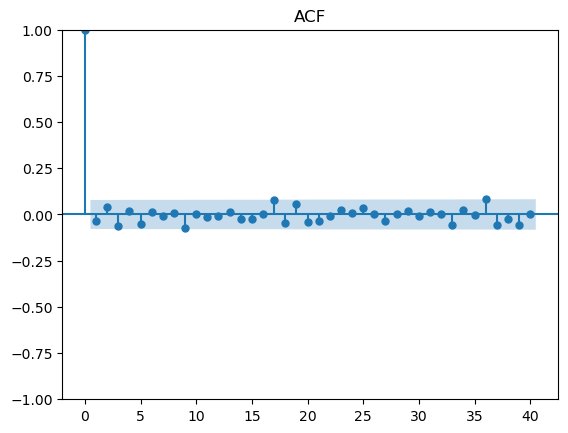

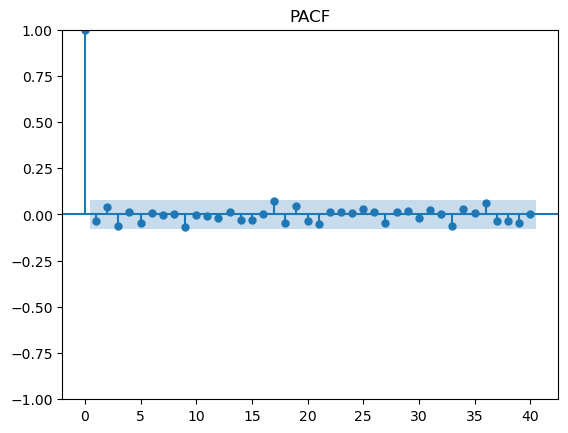

In [145]:
diff_series = X_train.diff().dropna()


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(diff_series, lags=40)
plt.title("ACF")
plt.show()

plot_pacf(diff_series, lags=40)
plt.title("PACF")
plt.show()

# USING pmdarima for finding the best ARIMA parameters

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5355.696, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5357.039, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5358.189, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5358.080, Time=0.36 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5359.977, Time=0.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=5360.472, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5356.989, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5355.506, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5357.102, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5358.863, Time=0.47 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5360.733, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5357.996, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5357.124, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5359.380, Time=0.78 sec
 ARIMA(3,1,0)(0

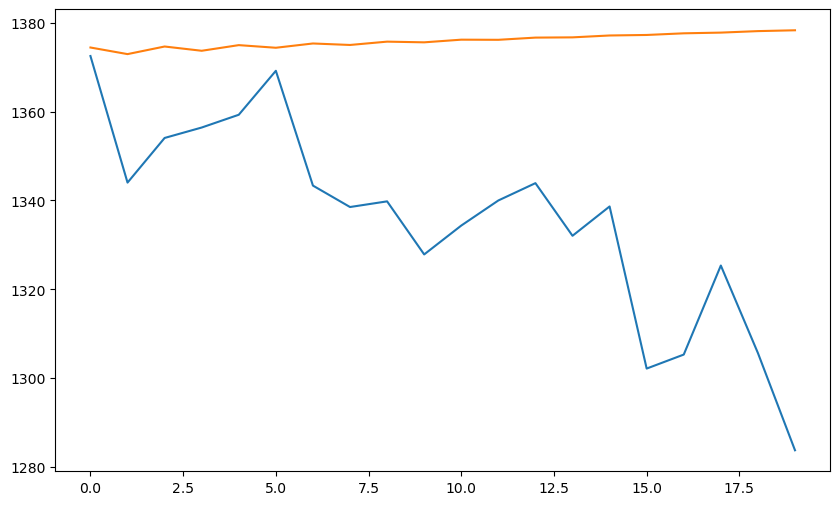

In [146]:
from pmdarima.model_selection import RollingForecastCV
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

cv = RollingForecastCV(h=10, initial=0.8)  # 80% initial train, rolling forecast

model_arima = auto_arima(X_train,
                   d=1,
                   start_p=0, max_p=40,
                   start_q=0, max_q=40,
                   seasonal=False,
                   cv=cv,
                   stepwise=False,  # exhaustive search
                   error_action='ignore',
                   suppress_warnings=True,
                   trace=True,
                   scoring='mse')

print(model_arima.summary())



model_arima.fit(X_train)
n_periods = len(X_test)
forecast = model_arima.predict(n_periods=n_periods)



plt.figure(figsize=(10,6))
X_test=X_test.reset_index(drop=True)
forecast.reset_index(drop=True,inplace=True)

plt.plot(X_test)


plt.plot(forecast)
plt.show()



# Residual Analysis

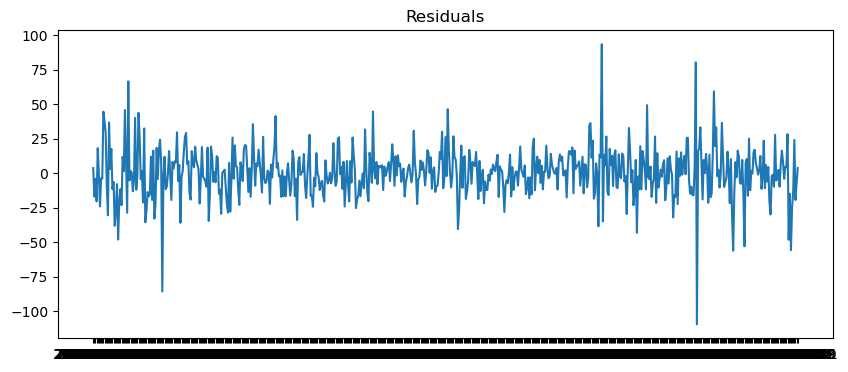

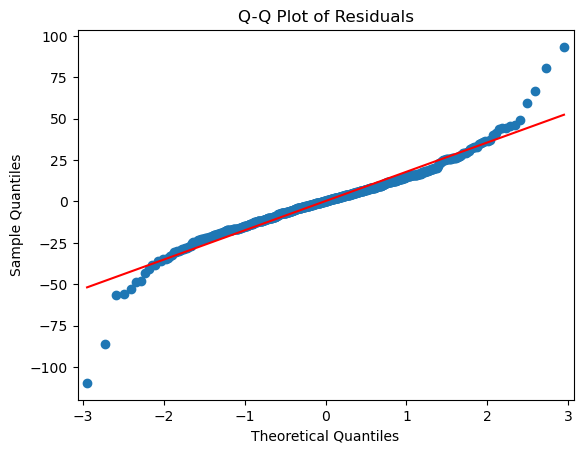

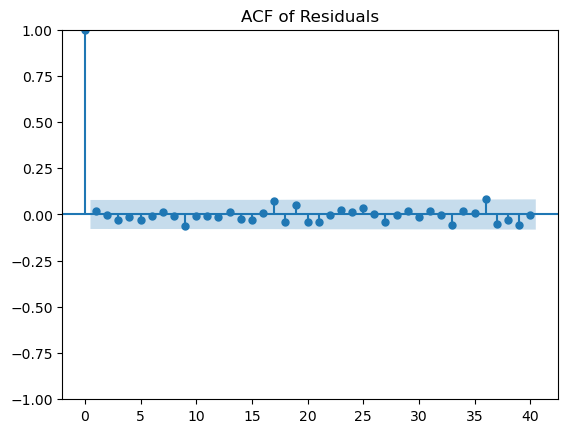

In [147]:
from statsmodels.tsa.arima.model import ARIMA

import warnings

warnings.filterwarnings("ignore")

model=ARIMA(X_train,order=(1,1,1))
model_fit=model.fit()

residuals=model_fit.resid
residuals=residuals.iloc[1:]



import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Residual plot
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals")
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# ACF of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()



# Ljung-Box Q test 

In [148]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# residuals is typically model_fit.resid
lb_test = acorr_ljungbox(residuals, lags=[10,20,30,35], return_df=True)
print(lb_test)

      lb_stat  lb_pvalue
10   4.082653   0.943541
20  12.779621   0.886638
30  16.489330   0.978208
35  19.035967   0.987127


__denotes the absense of autocorrelation__

In [149]:
from scipy.stats import shapiro


stat, p = shapiro(residuals)
print("Shapiro-Wilk Test Statistic =", stat)
print("p-value =", p,"\n")

if p > 0.05:
    print("Residuals are likely normally distributed (fail to reject H_0)")
else:
    print("Residuals are not normally distributed (reject H_0)")


Shapiro-Wilk Test Statistic = 0.9476600289344788
p-value = 4.8596611218650054e-14 

Residuals are not normally distributed (reject H_0)


# using statsmodels to forecast 5 step at a time using the best fitted model (walk-forward forecast)

5 stage Walk-Forward RMSE: 23.2044


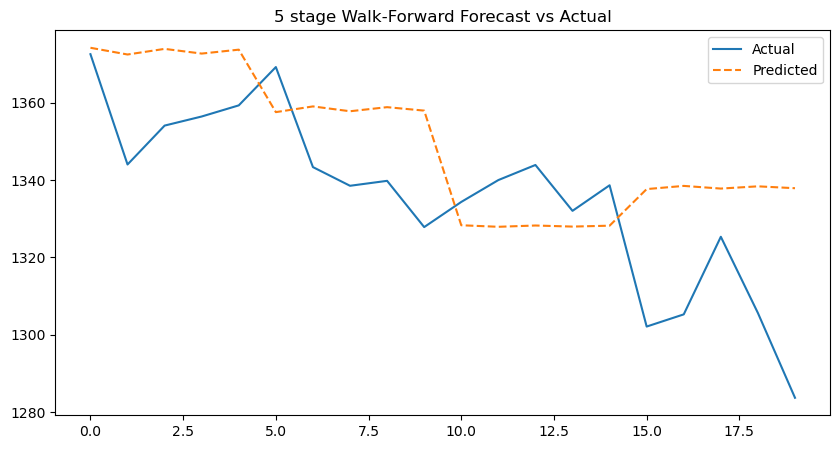

In [151]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Flatten and convert to float
X_train_flat = X_train.values.ravel() if hasattr(X_train, 'values') else np.ravel(X_train)
X_test_flat = X_test.values.ravel() if hasattr(X_test, 'values') else np.ravel(X_test)

train = list(X_train_flat.astype(float))
test = list(X_test_flat.astype(float))

predictions_arima = []
order = (1, 1, 1)  # Replace with optimal order
step_size = 5

for t in range(0, len(test), step_size):
    model = ARIMA(np.array(train), order=order)
    model_fit = model.fit()
    
    # Forecast up to 5 steps ahead (or fewer at the end)
    steps = min(step_size, len(test) - t)
    forecast = model_fit.forecast(steps=steps)
    predictions_arima.extend(forecast)
    
    # Update train with the actual next 5 values
    actuals = test[t:t + steps]
    train.extend(actuals)

# Evaluation and plot
rmse = np.sqrt(mean_squared_error(test[:len(predictions_arima)], predictions_arima))
print(f"{step_size} stage Walk-Forward RMSE: {rmse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(test, label='Actual')
plt.plot(predictions_arima, label='Predicted', linestyle='--')
plt.legend()
plt.title(f"{step_size} stage Walk-Forward Forecast vs Actual")
plt.show()


# ARIMA-GARCH MODEL

In [152]:
# ARCH -LM test for ARIMA residuals

In [153]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

lags=range(10,30,5)

# ARCH LM test from statsmodels
for lag in lags:
    lm_test = het_arch(residuals, nlags=lag) 
    print(f"Results of Arch LM test for ARIMA residuals for lags= {lag}")
    print("LM Stat:", lm_test[0])
    print("p-value:", lm_test[1])
    print("\n")


Results of Arch LM test for ARIMA residuals for lags= 10
LM Stat: 29.322976894746727
p-value: 0.0011044810795693295


Results of Arch LM test for ARIMA residuals for lags= 15
LM Stat: 35.21104802915633
p-value: 0.0022944170591109145


Results of Arch LM test for ARIMA residuals for lags= 20
LM Stat: 37.8300035329792
p-value: 0.009288667119719355


Results of Arch LM test for ARIMA residuals for lags= 25
LM Stat: 39.951591787713916
p-value: 0.02950002119616046




**Since, p-value is less than 0.05 for all these lags, the use of GARCH model is justified. This test
(ARCH-LM) is used to detect the conditional hetroskedasticity, i.e. volatility clustering in time series residuals.**


In [154]:
from arch import arch_model

best_aic = float('inf')
best_order = None
best_model = None

for p in range(1, 4):   # GARCH lags
    for q in range(1, 4):  # ARCH lags
        try:
            model = arch_model(residuals, vol='GARCH', p=p, q=q)
            fitted = model.fit(disp="off")
            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_order = (p, q)
                best_model = fitted
        except:
            continue

print(f"Best GARCH order: p={best_order[0]}, q={best_order[1]}")
print(f"Lowest AIC: {best_aic}")


Best GARCH order: p=1, q=2
Lowest AIC: 5296.688980124707


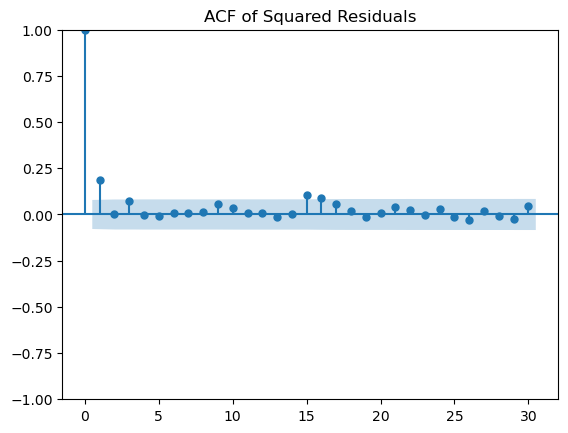

In [155]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.tsa.plot_acf(residuals**2, lags=30)
plt.title("ACF of Squared Residuals")
plt.show()


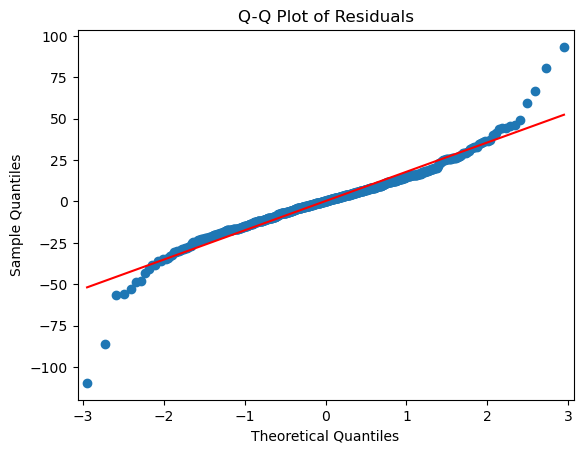

In [156]:
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")


plt.savefig("plot_1.png", dpi=300, bbox_inches='tight')# Options: png, jpg, pdf, svg

plt.show()
plt.close()


In [157]:
from scipy.stats import jarque_bera

jb_stat, p = jarque_bera(residuals)
print(f"Jarque-Bera p-value: {p}")


Jarque-Bera p-value: 0.0


In [158]:
from scipy.stats import skew
skewness_value = skew(residuals)

print(f"Skewness = {skewness_value:.4f}")


Skewness = -0.1135


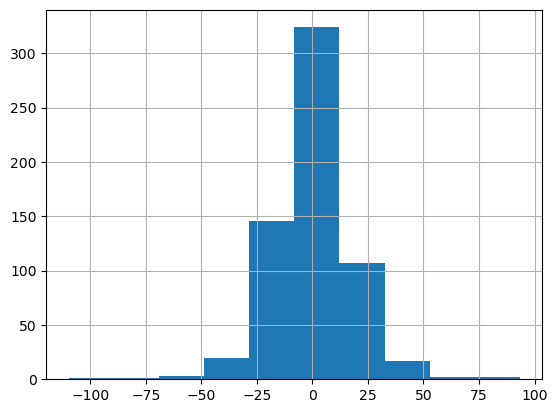

In [159]:
plt.hist(residuals);
plt.grid(True)

__Since the resdiduals are symmetric, we can use GARCH__


__update-1: TGARCH performed better than GARCH(1,2)__


GARCH Summary:
                         Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2614.62
Distribution:      Standardized Student's t   AIC:                           5241.24
Method:                  Maximum Likelihood   BIC:                           5267.85
                                              No. Observations:                  623
Date:                      Sat, Jul 05 2025   Df Residuals:                      622
Time:                              04:14:30   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------

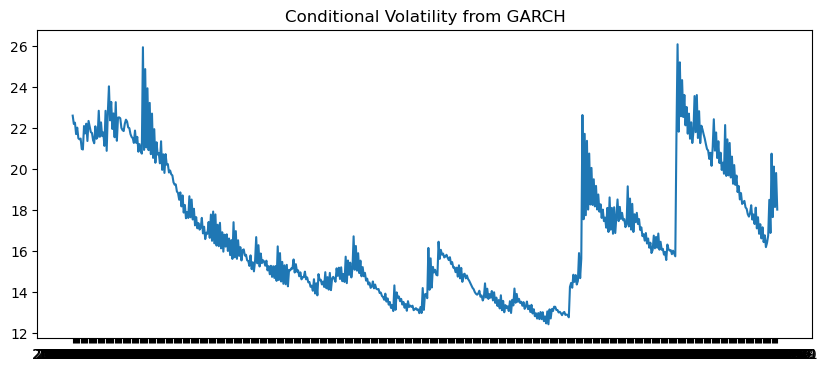

In [160]:
from arch import arch_model
garch_model = arch_model(residuals, vol='GARCH', p=1, q=2, dist='t')  # or dist='t'
garch_result = garch_model.fit(disp='off')


print("\nGARCH Summary:\n", garch_result.summary())


plt.figure(figsize=(10, 4))
plt.plot(garch_result.conditional_volatility)
plt.title("Conditional Volatility from GARCH")
plt.savefig("plot_22.png", dpi=300, bbox_inches='tight')# Options: png, jpg, pdf, svg
plt.show()


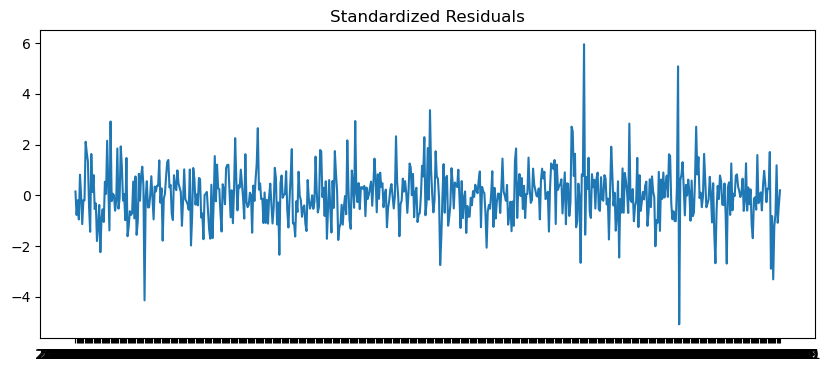

In [161]:
std_resid = garch_result.std_resid

plt.figure(figsize=(10,4))
plt.plot(std_resid)
plt.title("Standardized Residuals")
plt.show()

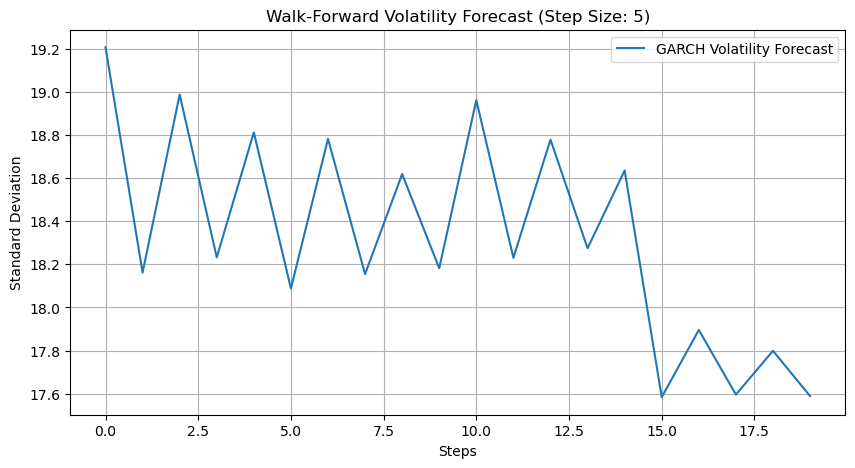

In [167]:
def garch_volatility_forecast(arima_residuals_train, test_residuals, step_size=1, garch_order=(1,1)):
    """
    Walk-forward GARCH volatility forecasting (updated for arch 4.15+)
    
    Parameters:
    arima_residuals_train (array-like): ARIMA residuals from training period
    test_residuals (array-like): ARIMA residuals from test period
    step_size (int): Forecast horizon at each step
    garch_order (tuple): (p,q) order for GARCH model
    
    Returns:
    numpy.ndarray: Standard deviation forecasts (volatility)
    """
    volatility_forecasts = []
    history = list(arima_residuals_train.copy())
    
    for t in range(0, len(test_residuals), step_size):
        # 1. Fit GARCH model
        model = arch_model(history, vol='Garch', p=garch_order[0], q=garch_order[1],dist="t")
        model_fit = model.fit(disp='off')
        
        # 2. Forecast volatility
        steps = min(step_size, len(test_residuals) - t)
        forecast = model_fit.forecast(horizon=steps, reindex=False)
        
        # 3. Get standard deviation - new method for arch 4.15+
        # variance is in .variance, take sqrt to get std dev
        std_dev = np.sqrt(forecast.variance.values[-1, :])
        volatility_forecasts.extend(std_dev)
        
        # 4. Update history with actual test residuals
        history.extend(test_residuals[t:t+steps])
    
    return np.array(volatility_forecasts)

X_test_values=np.array(X_test).reshape(len(X_test),)


# Get volatility forecasts
volatility_forecast = garch_volatility_forecast(
    arima_residuals_train=residuals,
    test_residuals=X_test_values-predictions_arima,
    step_size=step_size,
    garch_order=(1,2)
)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(volatility_forecast, label='GARCH Volatility Forecast')
plt.title(f'Walk-Forward Volatility Forecast (Step Size: {step_size})')
plt.xlabel('Steps')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

array([19.20820105, 18.16177406, 18.98816058, 18.23257466, 18.81288218,
       18.08793033, 18.78282787, 18.15494967, 18.61937415, 18.18191081,
       18.96241828, 18.23045733, 18.77889342, 18.27476313, 18.63598334,
       17.58307228, 17.89546112, 17.59522011, 17.79861592, 17.58861962])

5 stage Walk-Forward RMSE: 25.4938


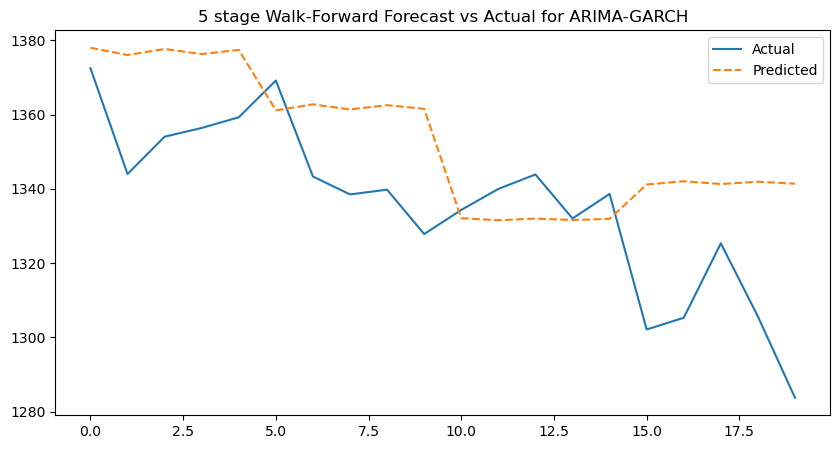

In [171]:
arima_garch_forecast=predictions_arima+0.2*volatility_forecast
rmse = np.sqrt(mean_squared_error(test[:len(predictions_arima)], arima_garch_forecast))
print(f"{step_size} stage Walk-Forward RMSE: {rmse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(test, label='Actual')
plt.plot(arima_garch_forecast, label='Predicted', linestyle='--')
plt.legend()
plt.title(f"{step_size} stage Walk-Forward Forecast vs Actual for ARIMA-GARCH")
plt.show()


## checking versionjs

In [172]:
import numpy
print(numpy.__version__)

1.24.4


In [173]:
import pmdarima
print(pmdarima.__version__)

2.0.4


## ARIMA-LSTM model

In [174]:
squared_residuals_arima=residuals**2

In [175]:
squared_residuals_arima.describe()

count      623.000000
mean       312.875776
std        834.852967
min          0.000050
25%         17.453398
50%         94.469507
75%        280.938715
max      12006.777996
Name: None, dtype: float64

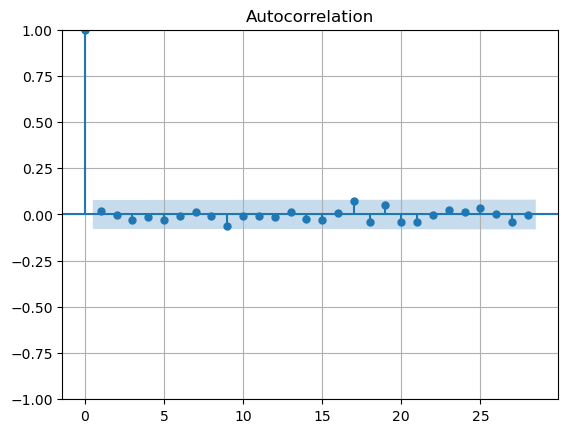

In [176]:
plot_acf(residuals)
plt.grid(True)

**optimal lag according to ACF plot is 16**

In [177]:
pip install numpy==1.23.5


Note: you may need to restart the kernel to use updated packages.


In [178]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert residuals to supervised learning format
def create_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df_supervised = pd.concat(columns, axis=1)
    df_supervised.fillna(0, inplace=True)
    return df_supervised.values

# Example: use lag=1 (can be tuned)
lag = 16
supervised = create_supervised(residuals, lag)
X, y = supervised[:, :-1], supervised[:, -1]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Reshape for LSTM [samples, features,timestamp]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1,lag))



In [179]:
X_scaled.mean(axis=0)


array([[0.54126608, 0.54132277, 0.54147683, 0.54128693, 0.54139286,
        0.54158805, 0.54202961, 0.54214822, 0.5425306 , 0.54230713,
        0.54227393, 0.54223764, 0.54227123, 0.54220644, 0.54207794,
        0.54202581]])

In [180]:
X_scaled.var()


0.007397162586593953

In [181]:
X_scaled.shape

(623, 1, 16)

In [198]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import itertools

# Your existing setup
lag = 16
supervised = create_supervised(residuals, lag)
X, y = supervised[:, :-1], supervised[:, -1]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

# Reshape for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, lag))

# Hyperparameter grid
param_grid = {
    'units': [25, 50, 75,100],
    'dropout_rate': [0.0, 0.2,0.4],
    'batch_size': [8, 16],
    'optimizer': ['adam']
}

param_combinations = list(itertools.product(*param_grid.values()))

# One-step ahead cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Model builder
def build_model(units, dropout_rate, optimizer):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(1, lag)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Grid Search Loop
best_rmse = float('inf')
best_params = None

for params in param_combinations:
    units, dropout_rate, batch_size, optimizer = params
    rmses = []

    for train_idx, val_idx in tscv.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

        model = build_model(units, dropout_rate, optimizer)
        model.fit(X_train, y_train, epochs=25, batch_size=batch_size, verbose=0)

        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses.append(rmse)

    avg_rmse = np.mean(rmses)
    print(f"Params: {params} → Avg RMSE: {avg_rmse:.5f}")

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_params = params

print(f"\n✅ Best Parameters: {best_params} → RMSE: {best_rmse:.5f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/stepWARNING:tensorflow:5 out of the last 23 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026D9DFA0310> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Params: (25, 0.0, 8, 'adam') → Avg RMSE: 0.08

In [201]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu',dropout=0.2, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Fit model
model_lstm.fit(X_scaled, y_scaled, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2342
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088
Epoc

In [202]:
# Start with the last `lag` residuals
last_input = residuals[-lag:]  # shape: (16,)
lstm_predictions = []
last_input=np.array(last_input)
# Normalize using the same scaler used for X
last_input_scaled = scaler.transform(last_input.reshape(-1, 1)).flatten()

n_pred=15

for _ in range(n_pred):
    # Reshape to match LSTM input shape: (1 sample, 1 timestep, lag features)
    input_reshaped = last_input_scaled.reshape(1, 1, lag)

    # Predict the next residual
    next_pred_scaled = model_lstm.predict(input_reshaped, verbose=0)

    # Inverse transform to original scale
    next_pred = scaler.inverse_transform(next_pred_scaled)[0, 0]

    # Save prediction
    lstm_predictions.append(next_pred)

    # Update input: remove oldest, append newest predicted value (scaled)
    last_input_scaled = np.append(last_input_scaled[1:], next_pred_scaled)

# Final predictions (in original scale)
print(f"Next {n_pred} predicted residuals:\n", lstm_predictions)


Next 15 predicted residuals:
 [-2.4033298, -2.6536694, -3.2406569, -3.7964642, -2.927267, -2.210586, -1.7258363, -3.455123, -2.7191386, -3.1521225, -2.9581935, -3.0652573, -2.5642881, -3.0673375, -2.9572139]


In [203]:
arima_lstm_predictions=np.array(predictions_arima[:n_pred])+np.array(lstm_predictions)

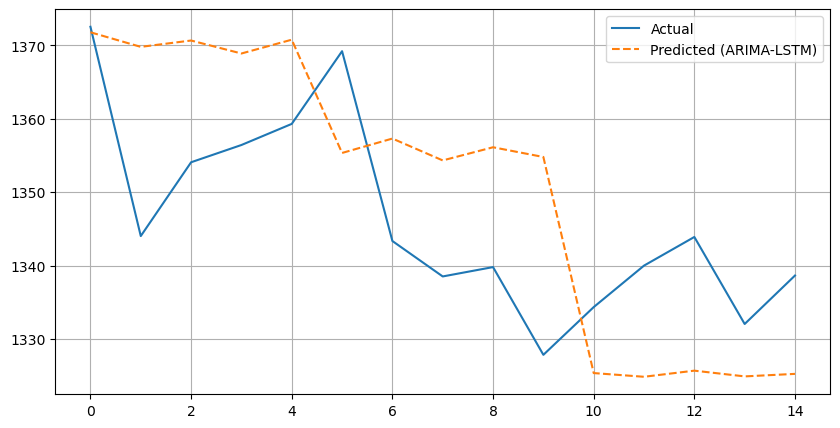

RMSE is 15.760915642377054


In [204]:
plt.figure(figsize=(10, 5))
plt.plot(X_test.iloc[:n_pred],label="Actual")
plt.plot(arima_lstm_predictions,label='Predicted (ARIMA-LSTM)', linestyle='--')
plt.grid(True)


plt.legend()
plt.show()


rmse = np.sqrt(mean_squared_error(X_test[:n_pred],arima_lstm_predictions))
print(f"RMSE is {rmse}")
